In [12]:
import rawpy
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage


In [13]:
ORF_FILE = Path("/mnt/fishsense_data/REEF/data/2023.08.03.FishSense.FSL-01D/Hogfish01_MolHITW_0926_080323/P8030100.ORF")

In [14]:
def uint8_2_double(img: np.ndarray) -> np.ndarray:
    return img.astype(np.float64) / 255

def uint16_2_double(img: np.ndarray) -> np.ndarray:
    return img.astype(np.float64) / 65535

def double_2_uint8(img: np.ndarray) -> np.ndarray:
    return (img * 255).astype(np.uint8)

def uint16_2_uint8(img: np.ndarray) -> np.ndarray:
    return double_2_uint8(uint16_2_double(img))

def imshow(img):
    if img.dtype == np.uint16:
        img = uint16_2_uint8(img)

    plt.imshow(img)


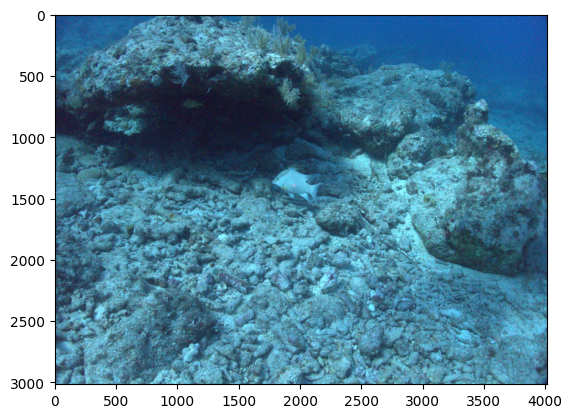

In [19]:
raw = rawpy.imread(ORF_FILE.as_posix())

raw_img = raw.raw_image_visible.copy()
raw_ref = raw.postprocess(use_camera_wb=True)

plt.imshow(raw_ref)

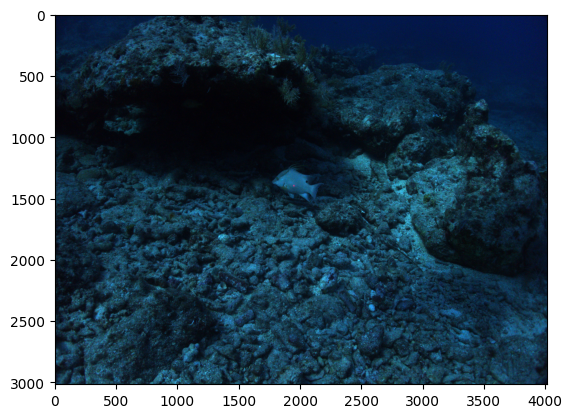

In [20]:
img = raw.postprocess(gamma=(1,1), no_auto_bright=True, use_camera_wb=True, output_bps=16)

imshow(img)

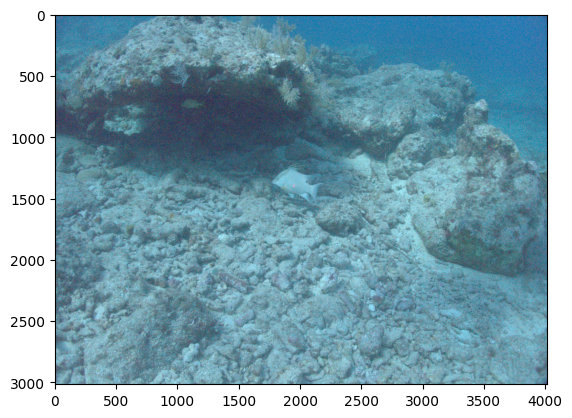

In [21]:
img_gamma = skimage.exposure.adjust_gamma(img, gamma=0.3)

imshow(img_gamma)

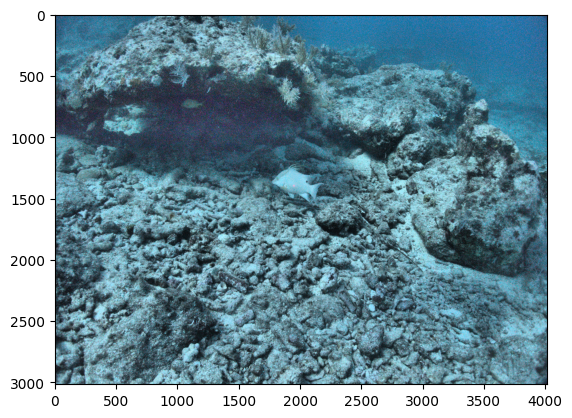

In [22]:
img_exposure = skimage.exposure.equalize_adapthist(img_gamma)

imshow(img_exposure)